# Discriminant Functions

The **discriminatory classification** is a branch of the techniques for the classification problem. Here, we directly model the decision boundary between two or more classes. In general, if we have 2 classes the discrimant function is fiven by $\hat{f}(x) = p(y=1|x)$ and then,<br><br>
<center>
\begin{equation}
 
\hat{y} = 
     \begin{cases}
       \text{1,} &\quad if\ \ \hat{f}(x)> 1/2 \\
       \text{0,} &\quad otherwise \\
     \end{cases}  
\end{equation}
</center>


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

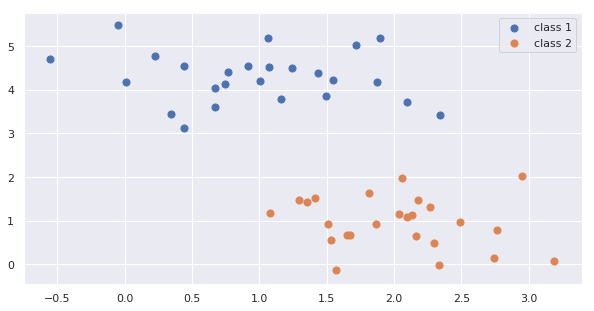

In [11]:
from sklearn.datasets.samples_generator import make_blobs # to generate one or more isotropic gaussian distribution
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(10,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=50, label='class 1')
plt.scatter(X[y!=0][:, 0], X[y!=0][:, 1], s=50, label='class 2')
plt.legend()

## Support Vector Machine

In this algorithm we will try to find the hyperplane that maximizes the distance of the closest point from either class.

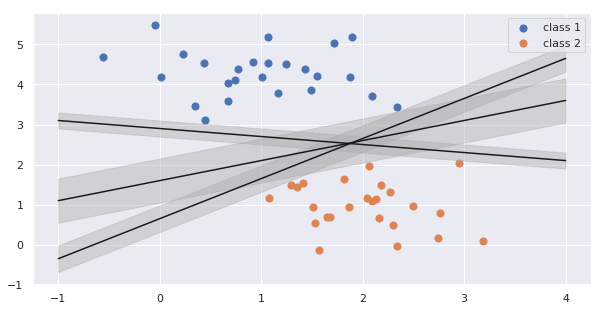

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=50, label='class 1')
plt.scatter(X[y!=0][:, 0], X[y!=0][:, 1], s=50, label='class 2')
plt.legend()

x_points = np.linspace(-1, 4)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_hyper = m * x_points + b
    plt.plot(x_points, y_hyper, '-k')
    plt.fill_between(x_points, y_hyper - d, y_hyper + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.show()

Mathmatically,<br>
We could do the dot product between a perpendicular vector $\vec{w}$ and the optimal decision boundary $\vec{b}$
<br><br>
<center>
$
\begin{equation}
\vec{w} \cdot \vec{b} = 0
\end{equation}
$
</center>

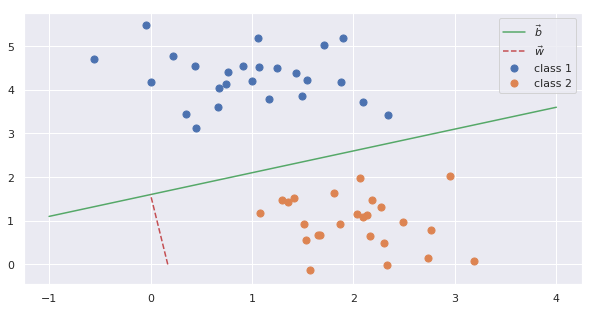

In [13]:
def boundary(x):
    return 0.5 * x + 1.6
plt.figure(figsize=(10,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=50, label='class 1')
plt.scatter(X[y!=0][:, 0], X[y!=0][:, 1], s=50, label='class 2')
plt.plot(x_points, boundary(x_points), 'g', label=r'$\vec{b}$')
plt.plot([0.17, 0], [0, boundary(0)], '--r', label=r'$\vec{w}$')

plt.legend()

Then, if we take any point we could do the proyection between the perpendicular vector $\vec{w}$ and this one $\vec{u}$

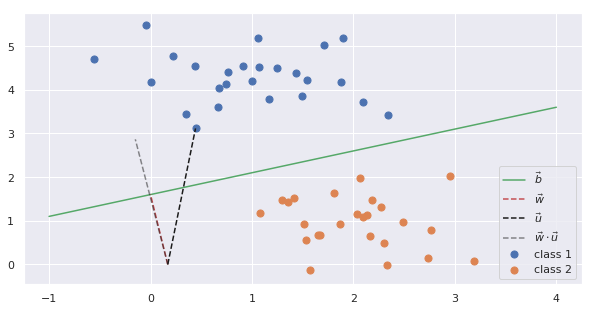

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=50, label='class 1')
plt.scatter(X[y!=0][:, 0], X[y!=0][:, 1], s=50, label='class 2')
plt.plot(x_points, boundary(x_points), 'g', label=r'$\vec{b}$')
plt.plot([0.17, 0], [0, boundary(0)], '--r', label=r'$\vec{w}$')
plt.plot([0.17, X[18][0]], [0, X[18][1]], '--k', label=r'$\vec{u}$')
plt.plot([0.17, -0.15], [0, X[18][1]-0.25], '--k', alpha=0.5, label=r'$\vec{w} \cdot \vec{u}$')
plt.legend()
plt.show()

Formally, we can select positive and negative points by using the dot product: <br><br>
<center>
$
\vec{w} \cdot \vec{u} = c 
$
</center><br><br>
if we equal to 0 (optimum decision boundary) and making c = -b <br><br>
<center>
$
\vec{w} \cdot \vec{u} + b = 0 
$
</center><br><br>
any point $x$ will be define as,
<center>
$
\begin{equation}
x = 
     \begin{cases}
       \text{positive,} &\quad if\ \vec{w} \cdot \vec{u} + b \geq 0 \\
       \text{negative,} &\quad if \vec{w} \cdot \vec{u} + b < 0 \\
     \end{cases}  
\end{equation}
$
</center>
<br><br>
In a more convenient way and using the information on the labels, we could say 
<br><br>
<center>
$
\vec{w} \cdot \vec{u(x_+)} + b \geq 1 \\
\vec{w} \cdot \vec{u(x_-)} + b \leq -1
$
</center><br><br>
For all samples, <br><br>
lets say, 
<center>
\begin{equation}
\hat{y} = 
     \begin{cases}
       \text{1,} &\quad for\ positive\ samples \\
       \text{-1,} &\quad for\ negative\ samples \\
     \end{cases}  
\end{equation}
</center>
<center>
$
y_i(\vec{w} \cdot \vec{u(x_i)} + b) \geq 1 \\
y_i(\vec{w} \cdot \vec{u(x_i)} + b) \geq 1
$
</center><br><br>
Then, we will make 0 all negative points and grater than 0 all positive points
<br><br>
<center>
$
y_i(\vec{w} \cdot \vec{u(x_i)} + b) - 1 \geq 0 \\
y_i(\vec{w} \cdot \vec{u(x_i)} + b) -1  = 0
$
</center><br><br>

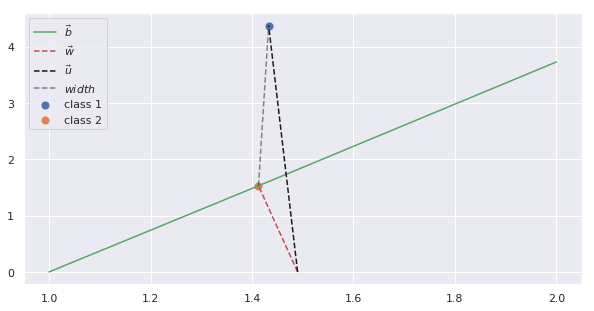

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(X[y==0][0][0], X[y==0][0][1], s=50, label='class 1')
plt.scatter(X[y!=0][0][0], X[y!=0][0][1], s=50, label='class 2')

plt.plot([1,X[y!=0][0][0],2] , [0, X[y!=0][0][1], X[y!=0][0][1]+2.2], 'g', label=r'$\vec{b}$')

plt.plot([1.49,X[y!=0][0][0]] , [0, X[y!=0][0][1]], '--r', label=r'$\vec{w}$')

plt.plot([1.49,X[y!=1][0][0]] , [0, X[y!=1][0][1]], '--k', label=r'$\vec{u}$')

plt.plot([X[y==1][0][0], X[y!=1][0][0]] , [X[y==1][0][1], X[y!=1][0][1]], '--k', alpha=0.5, label=r'$width$')
plt.legend()

The widh will be
<center>
$
width = (\vec{u}(x_+) - \vec{u}(x_+))\cdot \frac{\vec{w}}{||\vec{w}||}
$
</center>
<br><br>
where $\vec{u}(x_+) = 1-b$ and $\vec{u}(x_-) = 1+b$
<br><br>
<center>
$
width = \frac{2}{||\vec{w}||}
$
</center>
<br><br>
we need to maximize the width between points $max{\frac{2}{||w||}}$ and thats equal to:
<br><br>
<center>
$
max \frac{1}{||w||}
$
</center>
<br>
or
<br>
<center>
$
min ||w||
$
</center>
<br><br>
Finally, the optimization problem to solve classification using SVM is:
</center>
<br><br>
<center>
$
min \frac{1}{2}||w||\ \ subject\ to\ \  y_i(\vec{w} \cdot \vec{u(x_i)} + b) \geq 1
$
</center>
<br> 
<br>

In [16]:
from sklearn import svm # Import Support Vector Machine from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from mlxtend.plotting import plot_decision_regions

In [17]:
x, y_ = shuffle(X, y)
x_train, x_test, y_train, y_test = train_test_split(x,y_)

In [18]:
model = svm.SVC(kernel='linear') 
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

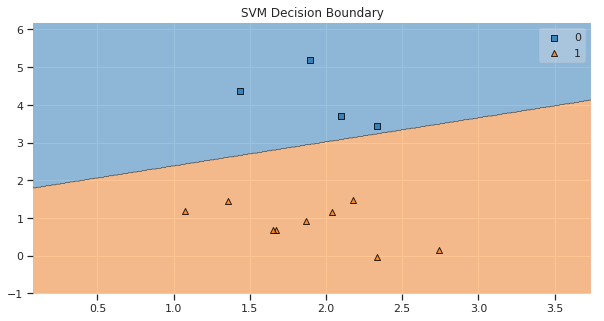

In [19]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,5))
plot_decision_regions(X=x_test, 
                      y=y_pred,
                      clf=model, 
                      legend=1)
plt.title('SVM Decision Boundary')
plt.show()

### Kernel Trick

One major limitation of SVM is that it is limited to linear decision boundaries. To resolve this we can use a kernel wich takes low dimensional input space and transform it to a higher dimensional space - it is assumed that in higher dimensionality the data can be separated linearly. 

<img  height="450" width="450" src="./img/kernel.JPG">

Scikit-learn allow us to use different kinds of kernels:<br><br>
<img  height="550" width="550" src="./img/kernels_scikit.png">

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


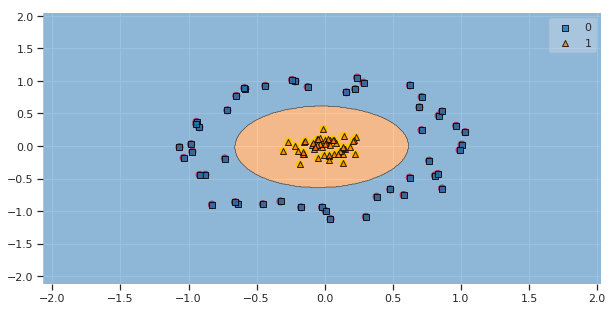

In [20]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = svm.SVC(kernel='rbf').fit(X, y) # using linear kernel

plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=1)
plt.show()

## Decision Trees

Another way to make classifitions finding a decision boundary is to use a decision tree. As with the tree structures, the top node of the decision tree contains the entire data set.<br>
At each branch of the tree these data are subdivided into two child nodes (or subsets), based on a predefined decision boundary. <br>
This splitting process repeats, recursively, until we
achieve a predefined stopping criteria

### How we can define the split criteria ?
In order to build a decision we need to choose the feature an dvalue on which we wish to split the data. 
We can use the information content or entropy of the data
<center>
$
E(x) = -\sum_ip_i(x)ln(p_i(x))
$
</center>
<br>
where $i \in \{0,...,K\}$ and K = number of classes. It mean that $p_i(x)$ is the probability of class $i$ given data $x$.
<br><br>
Then, we can define information gain as the reduction in entropy due to the partitioning of the data:
<br>
<center>
$
IG(x|x_i) = E(x) - \sum_i \frac{N_i}{N}E(x_i)
$
</center>
<br>
where $N_i$ is the number of points $x_i$ in the ith class, and $E(x_i)$ is the entropy associated with that class (Kullback-Leibler divergence)
<br><br>
A common loss function in decision trees is the Gini coefficient which estimates the probability that a source would be incorrectly classified. An optimum Gini coefficient will be zero. 
<br>
<center>
$
G = \sum_i^K p_i(1-p_i)
$
</center>
<br>
An other error measure is the misclassification error MC. It represent the probability that a point selected at random will be misclassified,
<br>
<center>
$
MC = 1 - max_i(p_i)
$
</center>
<br>
The Gini coefficient and classification error are commonly used in classification trees where the classification is categorical. 

We will show 

In [21]:
import sklearn.datasets as datasets
import pandas as pd
iris = datasets.load_iris()
df   = pd.DataFrame(iris.data, columns=iris.feature_names)
y    = iris.target

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus # pip install pydotplus
import collections
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [24]:
# Training
clf = DecisionTreeClassifier()
clf = clf.fit(df,y)

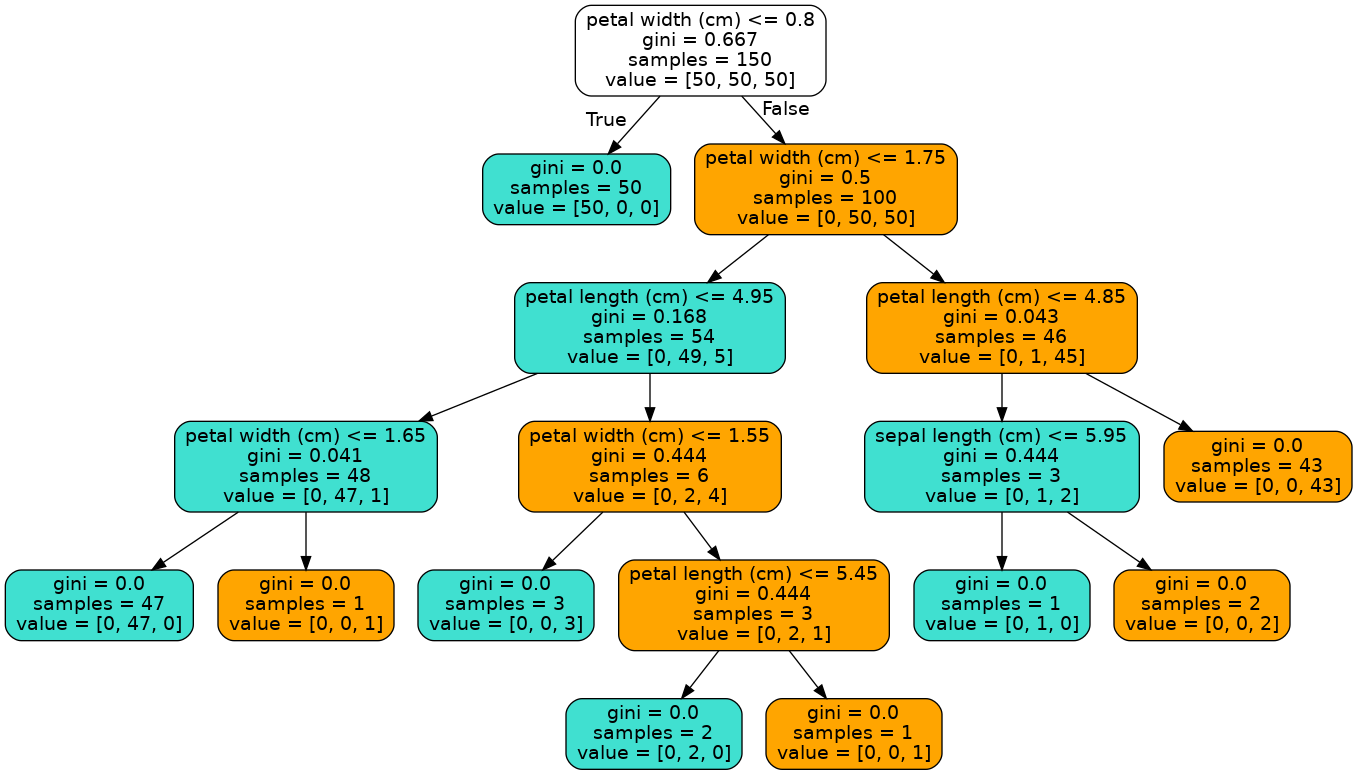

In [25]:
# Visualize data
dot_data = export_graphviz(clf,
                           feature_names=iris.feature_names,
                           out_file=None,
                           filled=True,
                           rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
viewPydot(graph)

## Random Forest

* n trees
* for each tree:
 * select a bootstrap sample (drawing with replacement)
 * train using $m$ randomly chosen attributes for splitting each node
* $f(x) = \frac{1}{N}\sum_{i=1}^n f_i(x)$, where $f_i(x)$ is the label estimated by the $i$th tree.

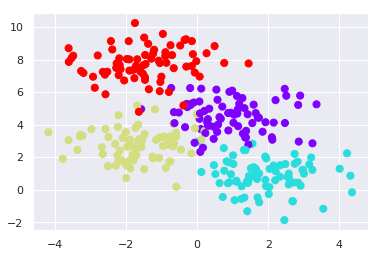

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [27]:
x, y_ = shuffle(X, y)
x_train, x_test, y_train, y_test = train_test_split(x,y_)

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


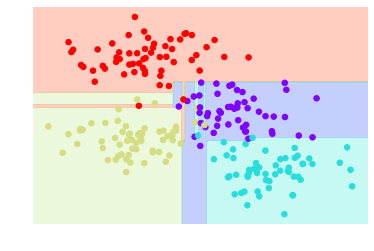

In [28]:
from util import visualize_classifier
from sklearn.tree import DecisionTreeClassifier
visualize_classifier(DecisionTreeClassifier(), x_train, y_train)

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


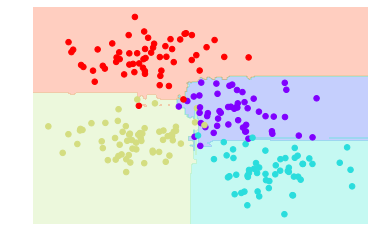

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, x_train, y_train);

The RF model is closer than a single decision tree. It is because we have averaged more than 100 models at random.

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
#fitting
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print('Decision tree accuracy: ',dt.score(x_test, y_test))
print('Random Forest accuracy: ',rf.score(x_test, y_test))

Decision tree accuracy:  0.8933333333333333
Random Forest accuracy:  0.8933333333333333


In [32]:
from util import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
mpl.style.use('classic')

In [33]:
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [34]:
cnf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

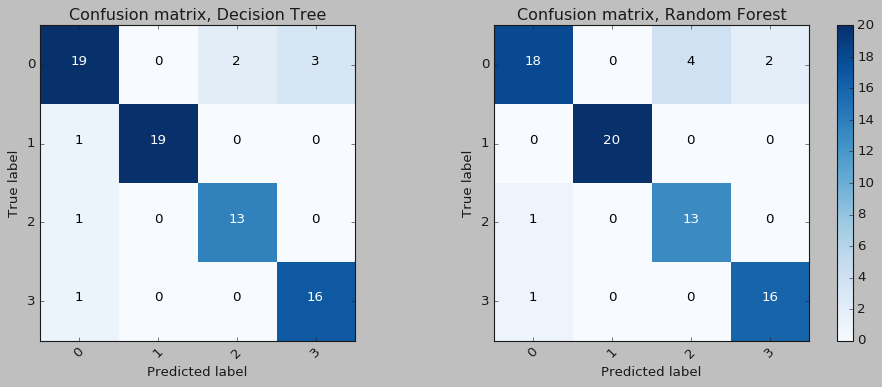

In [35]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix_dt, classes=np.unique(y_train), normalize=False,
                      title='Confusion matrix, Decision Tree')

plt.subplot(122)
plot_confusion_matrix(cnf_matrix_rf, classes=np.unique(y_train), normalize=False,
                      title='Confusion matrix, Random Forest')

plt.show()

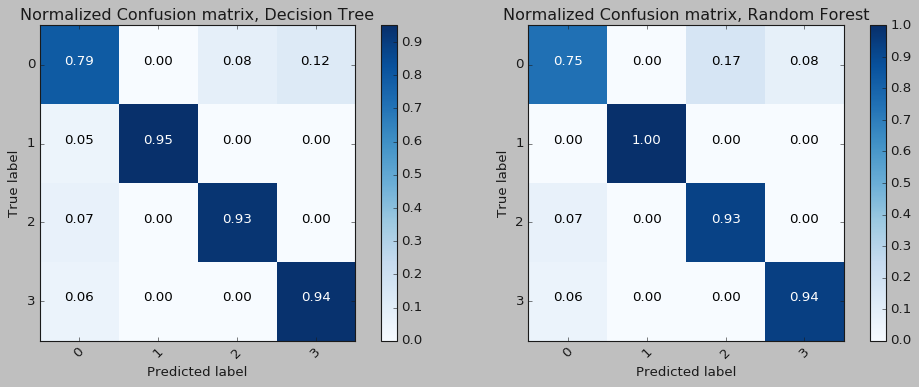

In [36]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix_dt, classes=np.unique(y_train), normalize=True,
                      title='Normalized Confusion matrix, Decision Tree')

plt.subplot(122)
plot_confusion_matrix(cnf_matrix_rf, classes=np.unique(y_train), normalize=True,
                      title='Normalized Confusion matrix, Random Forest')

plt.show()

# Australian Credit Approval
This data set includes credit card applications.


**Data Sources**: 
- Ross Quinlan. "Simplifying decision trees", Int J Man-Machine Studies 27, Dec 1987, pp. 221-234. [Web Link](http://rexa.info/paper/a4b6ebb7accef3ee497d6e127f4a0adc5ab16d25)

- Ross Quinlan. "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992 [Web Link](http://rexa.info/paper/ad6784a63b18b8018e884ada406b63bc1c9fa6e3)

In [37]:
dataframe = pd.read_csv('./agaricus.csv', sep=' ')

In [38]:
dataframe.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [39]:
samples  = dataframe[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']]
labels = dataframe['class']

In [40]:
print('input dimension: ',samples.shape)

input dimension:  (690, 14)


In [41]:
np.unique(labels)

array([0, 1])

In [42]:
x, y_ = shuffle(samples, labels)
x_train, x_test, y_train, y_test = train_test_split(x, y_, test_size=0.3)

In [43]:
model = svm.SVC(kernel='rbf')  # Support Vector Machine
model.fit(x_train, y_train)
score_svm = model.score(x_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
score_rf = rf.score(x_test, y_test)

In [45]:
print(score_svm, score_rf)

0.5169082125603864 0.8502415458937198


## Improving the SVM performance

In [46]:
import seaborn as sns; sns.set()

In [47]:
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

kf = KFold(n_splits=3)
x,y = shuffle(samples,labels)
x = np.array(x)
y = np.array(y)

gamma_range = 10. ** np.arange(-5, 5)

results_mean = []
results_std = []
for g in gamma_range:
    mean_acc = []
    for train, test in kf.split(X=x):
        x_train = x[train]
        y_train = y[train]
        x_test = x[test]
        y_test = y[test]
        #print('c:{0} g:{1}'.format(c,g))
        model = svm.SVC(kernel='rbf', gamma=g)  # Support Vector Machine
        model.fit(x_train, y_train)
        score_svm = model.score(x_test, y_test)
        mean_acc.append(score_svm)
    results_mean.append(np.mean(mean_acc))
    results_std.append(np.std(mean_acc))


In [48]:
results_mean[1]

0.6855072463768116

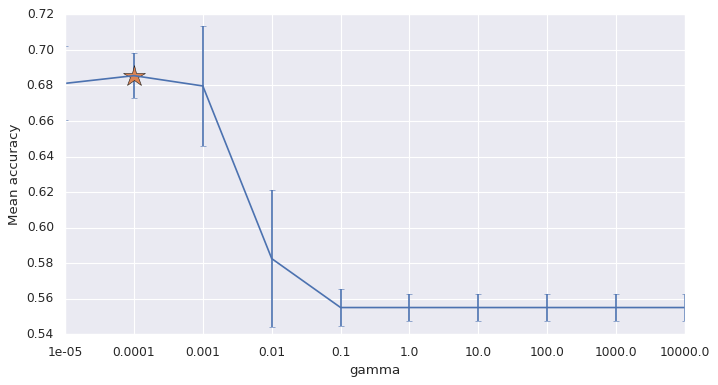

In [54]:
best_model = np.argmax(results_mean)
plt.figure(figsize=(10,5))
plt.errorbar(range(0,len(results_mean)), results_mean, yerr=results_std)
plt.plot(best_model, results_mean[best_model], '*', markersize=20)
plt.xticks(range(0, len(results_mean)), gamma_range)
plt.ylabel('Mean accuracy')
plt.xlabel('gamma')
plt.show()

In [55]:
model = svm.SVC(kernel='rbf', gamma=gamma_range[best_model])  # Support Vector Machine
model.fit(x_train, y_train)
score_svm = model.score(x_test, y_test)

In [56]:
print(score_svm, score_rf)

0.6869565217391305 0.8502415458937198
